In [1]:
import akebono

akebono.orb(['1990-4-1', '1990-4-2'])

17-Sep-23 22:16:38: File is current: ../akebono_data/orbit/daily/199004/ED900401.txt


['akb_orb_geo',
 'akb_orb_gdlat',
 'akb_orb_gdlon',
 'akb_orb_inv',
 'akb_orb_fmlat',
 'akb_orb_mlt',
 'akb_orb_alt',
 'akb_orb_gcalt',
 'akb_orb_gclat',
 'akb_orb_gclon']

In [4]:
import pytplot

inv = pytplot.get_data('akb_orb_inv')
inv.times

array([6.3892800e+08, 6.3892803e+08, 6.3892806e+08, ..., 6.3901431e+08,
       6.3901434e+08, 6.3901437e+08])

In [6]:
import pyspedas

time = pyspedas.time_datetime(inv.times)
time[0]

datetime.datetime(1990, 4, 1, 0, 0, tzinfo=datetime.timezone.utc)

In [7]:
time[1] - time[0]

datetime.timedelta(seconds=30)

Miyake et al 2003 イベントでのEFDスペクトルとMCAスペクトルの比較

In [19]:
from store_high_time_res_spectrum_data import store_mca_high_time_res_data

store_mca_high_time_res_data(date='1990-2-22')

In [20]:
import pytplot
import matplotlib.pyplot as plt

mca_data = pytplot.get_data('akb_mca_Emax_pwr', xarray=True)
mca_data

<xarray.DataArray 'akb_mca_Emax_pwr' (time: 172800, v_dim: 16)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [5.01187234e-03, 6.30957344e-03, 6.30957344e-03, ...,
        2.51188643e-09, 3.16227766e-09, 1.58489319e-08],
       [1.99526231e-05, 1.99526231e-05, 3.16227766e-05, ...,
        5.01187234e-11, 3.16227766e-11, 6.30957344e-11],
       ...,
       [1.25892541e-03, 6.30957344e-02, 3.98107171e-03, ...,
        1.00000000e-07, 5.01187234e-08, 3.16227766e-08],
       [1.58489319e-05, 2.51188643e-03, 1.00000000e-05, ...,
        3.98107171e-10, 1.58489319e-10, 1.25892541e-10],
       [1.58489319e-03, 7.94328235e-02, 5.01187234e-04, ...,
        7.94328235e-08, 6.30957344e-08, 1.58489319e-07]])
Coordinates:
  * time       (time) datetime64[ns] 1990-02-22T00:00:00.250000 ... 1990-02-2...
    spec_bins  (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
    v          (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: v_dim
Attributes:
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

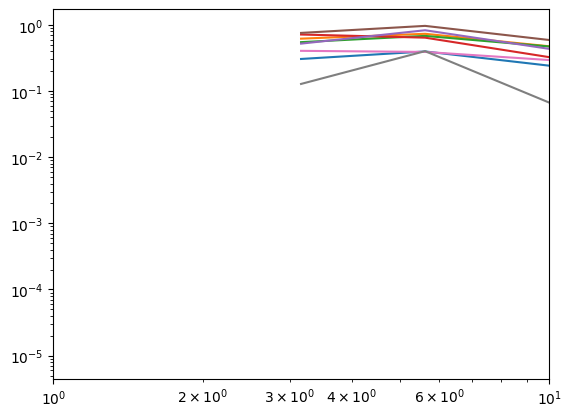

In [24]:
start_time = '1990-02-22T23:15:00'
end_time = '1990-02-22T23:16:45'

time_slice = mca_data.sel(time=slice(start_time, end_time))

# 15秒間隔でダウンサンプリングして平均を計算する
resampled_data = time_slice.resample(time='15S').mean()

spec_bins = mca_data.coords['spec_bins'].values

plt.figure()
for i in range(len(resampled_data['time'])):
    plt.plot(spec_bins, resampled_data[i, :])
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,10)
plt.show()

強度平均、中央値　（周波数vs振動角度）

In [1]:
from calc_pwr_matrix_angle_vs_freq import calc_pwr_matrix_angle_vs_freq

date = '1990-02-11'
start_time = '18:05:00'
end_time='18:09:00'
intensity_e_matrix, intensity_m_martrix = calc_pwr_matrix_angle_vs_freq(date=date,
                                                                        start_time=start_time,
                                                                        end_time=end_time)

In [71]:
import pytplot
xar = pytplot.data_quants['angle_btwn_B0_Ey']
# xar.dataの値を16個おきに取り出す
xar_0 = xar.data[::16]
xar_8 = xar.data[8::16]
type(xar)

xarray.core.dataarray.DataArray

In [72]:
tvar = pytplot.get_data('angle_btwn_B0_Ey')
type(tvar)

pytplot.get_data.variable

(array([3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 5.361e+03,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 96.63675239, 111.49260326, 126.34845412, 141.20430498,
        156.06015585, 170.91600671, 185.77185757, 200.62770844,
        215.4835593 , 230.33941016, 245.19526103]),
 <BarContainer object of 10 artists>)

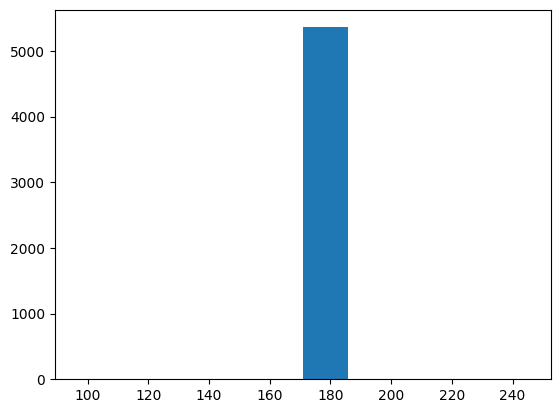

In [69]:
import matplotlib.pyplot as plt

plt.hist(xar_0+xar_8)

In [80]:
import numpy as np
a = np.arange(10, dtype=float).reshape(2,5)
a[0][2] = np.nan
a, np.nanmin(a, axis=0)

(array([[ 0.,  1., nan,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.]]),
 array([0., 1., 7., 3., 4.]))

In [82]:
b = np.arange(15).reshape(3,5)
[a, b]

[array([[ 0.,  1., nan,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.]]),
 array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])]

In [77]:
np.arange(2)+np.arange(3)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

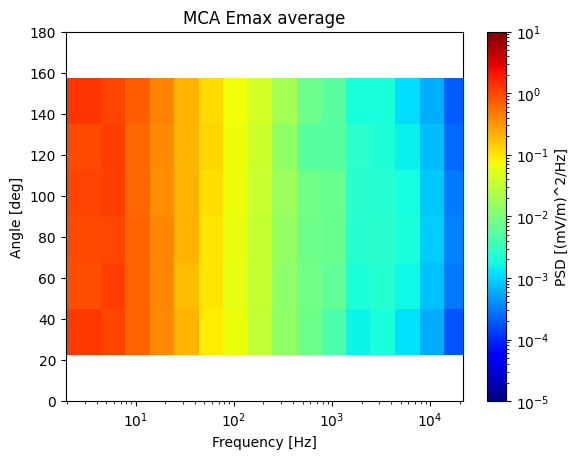

In [5]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
# 作成した角度ごとのMCAのデータ(8*16の配列)をプロットする
freq = np.array([3.16, 5.62, 10, 17.6,
                 31.6, 56.2, 100, 176,
                 316, 562, 1000, 1760,
                 3160, 5620, 10000, 17600])

angle = np.array([11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75])
average_E_matrix = [np.nanmean(intensity_e_matrix[i], axis=0) for i in range(8)]
fig, ax = plt.subplots()
im = ax.pcolormesh(freq, angle, average_E_matrix, cmap='jet', norm=LogNorm(vmin=1e-5, vmax=10))
# カラーバーの追加
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('PSD [(mV/m)^2/Hz]')
# カラーバーの値の範囲の設定

ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_title('MCA Emax average')
plt.savefig('../plots/freq_angle_pwr_plot/'+date+'_'+start_time.replace(':', '')+'_'+end_time.replace(':','')+'_Emax_average.png')
plt.show()


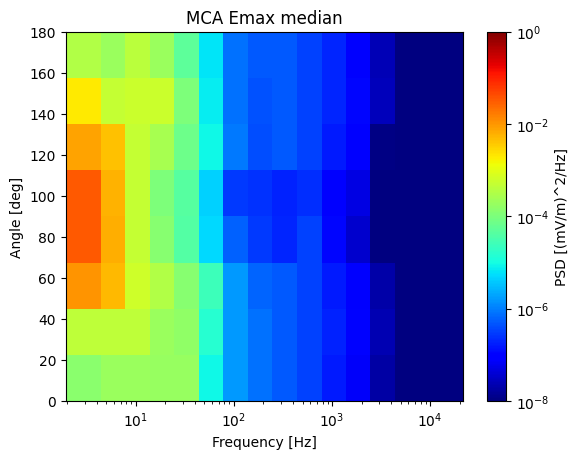

In [47]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
# 作成した角度ごとのMCAのデータ(8*16の配列)をプロットする
freq = np.array([3.16, 5.62, 10, 17.6,
                 31.6, 56.2, 100, 176,
                 316, 562, 1000, 1760,
                 3160, 5620, 10000, 17600])

angle = np.array([11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75])

fig, ax = plt.subplots()
im = ax.pcolormesh(freq, angle, medi_e, cmap='jet', norm=LogNorm(vmin=1e-8, vmax=1))
# カラーバーの追加
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('PSD [(mV/m)^2/Hz]')
# カラーバーの値の範囲の設定

ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_title('MCA Emax median')
plt.savefig('../plots/freq_angle_pwr_plot/'+date+'_'+start_time.replace(':', '')+'_'+end_time.replace(':','')+'_Emax_median.png')
plt.show()


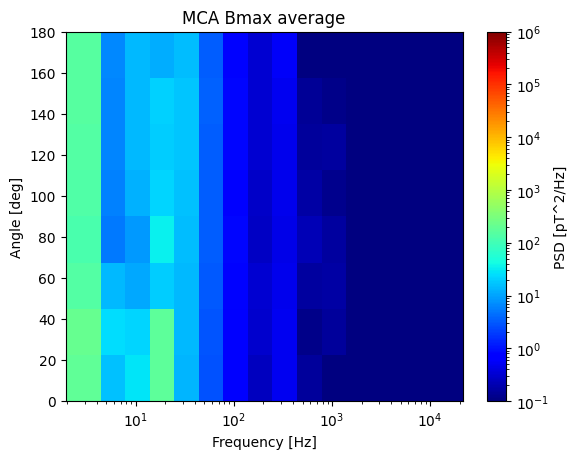

In [45]:
from matplotlib.colors import LogNorm
# 作成した角度ごとのMCAのデータ(8*16の配列)をプロットする
freq = np.array([3.16, 5.62, 10, 17.6,
                 31.6, 56.2, 100, 176,
                 316, 562, 1000, 1760,
                 3160, 5620, 10000, 17600])

angle = np.array([11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75])

fig, ax = plt.subplots()
im = ax.pcolormesh(freq, angle, intensity_m_martrix, cmap='jet', norm=LogNorm(vmin=1e-1, vmax=1e6))
# カラーバーの追加
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('PSD [pT^2/Hz]')
# カラーバーの値の範囲の設定

ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_title('MCA Bmax average')
plt.savefig('../plots/freq_angle_pwr_plot/'+date+'_'+start_time.replace(':', '')+'_'+end_time.replace(':','')+'_Bmax_average.png')
plt.show()


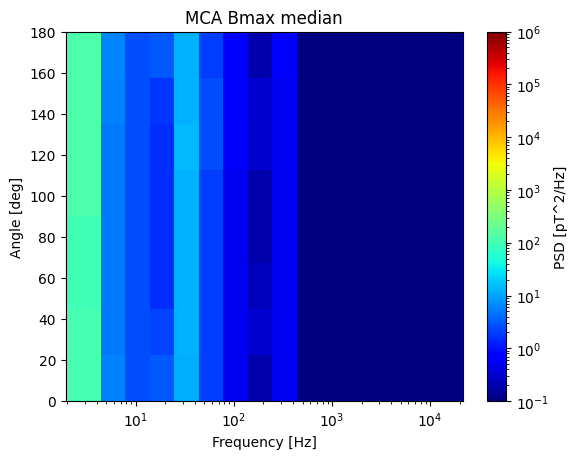

In [46]:
from matplotlib.colors import LogNorm
# 作成した角度ごとのMCAのデータ(8*16の配列)をプロットする
freq = np.array([3.16, 5.62, 10, 17.6,
                 31.6, 56.2, 100, 176,
                 316, 562, 1000, 1760,
                 3160, 5620, 10000, 17600])

angle = np.array([11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75])

fig, ax = plt.subplots()
im = ax.pcolormesh(freq, angle, medi_m, cmap='jet', norm=LogNorm(vmin=1e-1, vmax=1e6))
# カラーバーの追加
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('PSD [pT^2/Hz]')
# カラーバーの値の範囲の設定

ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_title('MCA Bmax median')
plt.savefig('../plots/freq_angle_pwr_plot/'+date+'_'+start_time.replace(':', '')+'_'+end_time.replace(':','')+'_Bmax_median.png')
plt.show()


high time res plot

In [1]:
import pytplot
from store_high_time_res_spectrum_data import store_mca_high_time_res_data, store_mgf_data
import akebono
import utilities

date = '1990-02-25'
next_date = utilities.get_next_date(date)
store_mgf_data(date)
store_mca_high_time_res_data(date, datatype='pwr')
akebono.orb(trange=[date, next_date])
pytplot.tplot_names()

25-Apr-23 20:48:02: File is current: ../akebono_data/orbit/daily/199002/ED900225.txt


0 : angle_btwn_B0_Ey
1 : angle_btwn_B0_sBy
2 : akb_mca_Emax
3 : akb_mca_Eave
4 : akb_mca_Bmax
5 : akb_mca_Bave
6 : akb_mca_PostGap
7 : akb_mca_Emax_pwr
8 : akb_mca_Eave_pwr
9 : akb_mca_Bmax_pwr
10 : akb_mca_Bave_pwr
11 : akb_orb_geo
12 : akb_orb_gdlat
13 : akb_orb_gdlon
14 : akb_orb_inv
15 : akb_orb_fmlat
16 : akb_orb_MLT
17 : akb_orb_ALT
18 : akb_orb_gcalt
19 : akb_orb_gclat
20 : akb_orb_gclon


['angle_btwn_B0_Ey',
 'angle_btwn_B0_sBy',
 'akb_mca_Emax',
 'akb_mca_Eave',
 'akb_mca_Bmax',
 'akb_mca_Bave',
 'akb_mca_PostGap',
 'akb_mca_Emax_pwr',
 'akb_mca_Eave_pwr',
 'akb_mca_Bmax_pwr',
 'akb_mca_Bave_pwr',
 'akb_orb_geo',
 'akb_orb_gdlat',
 'akb_orb_gdlon',
 'akb_orb_inv',
 'akb_orb_fmlat',
 'akb_orb_MLT',
 'akb_orb_ALT',
 'akb_orb_gcalt',
 'akb_orb_gclat',
 'akb_orb_gclon']

In [53]:
pytplot.tplot_names()

0 : angle_btwn_B0_Ey
1 : angle_btwn_B0_sBy
2 : akb_mca_Emax
3 : akb_mca_Eave
4 : akb_mca_Bmax
5 : akb_mca_Bave
6 : akb_mca_PostGap
7 : akb_mca_Emax_pwr
8 : akb_mca_Eave_pwr
9 : akb_mca_Bmax_pwr
10 : akb_mca_Bave_pwr
11 : akb_orb_geo
12 : akb_orb_gdlat
13 : akb_orb_gdlon
14 : akb_orb_inv
15 : akb_orb_fmlat
16 : akb_orb_MLT
17 : akb_orb_ALT
18 : akb_orb_gcalt
19 : akb_orb_gclat
20 : akb_orb_gclon


['angle_btwn_B0_Ey',
 'angle_btwn_B0_sBy',
 'akb_mca_Emax',
 'akb_mca_Eave',
 'akb_mca_Bmax',
 'akb_mca_Bave',
 'akb_mca_PostGap',
 'akb_mca_Emax_pwr',
 'akb_mca_Eave_pwr',
 'akb_mca_Bmax_pwr',
 'akb_mca_Bave_pwr',
 'akb_orb_geo',
 'akb_orb_gdlat',
 'akb_orb_gdlon',
 'akb_orb_inv',
 'akb_orb_fmlat',
 'akb_orb_MLT',
 'akb_orb_ALT',
 'akb_orb_gcalt',
 'akb_orb_gclat',
 'akb_orb_gclon']

26-Apr-23 01:37:49: /Document/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:427: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  xaxis_ticks_dt = [np.datetime64(mpl.dates.num2date(tick_val).isoformat()) for tick_val in xaxis_ticks]

26-Apr-23 01:37:49: /Document/akebono_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:622: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs={'fill_value': 'extrapol

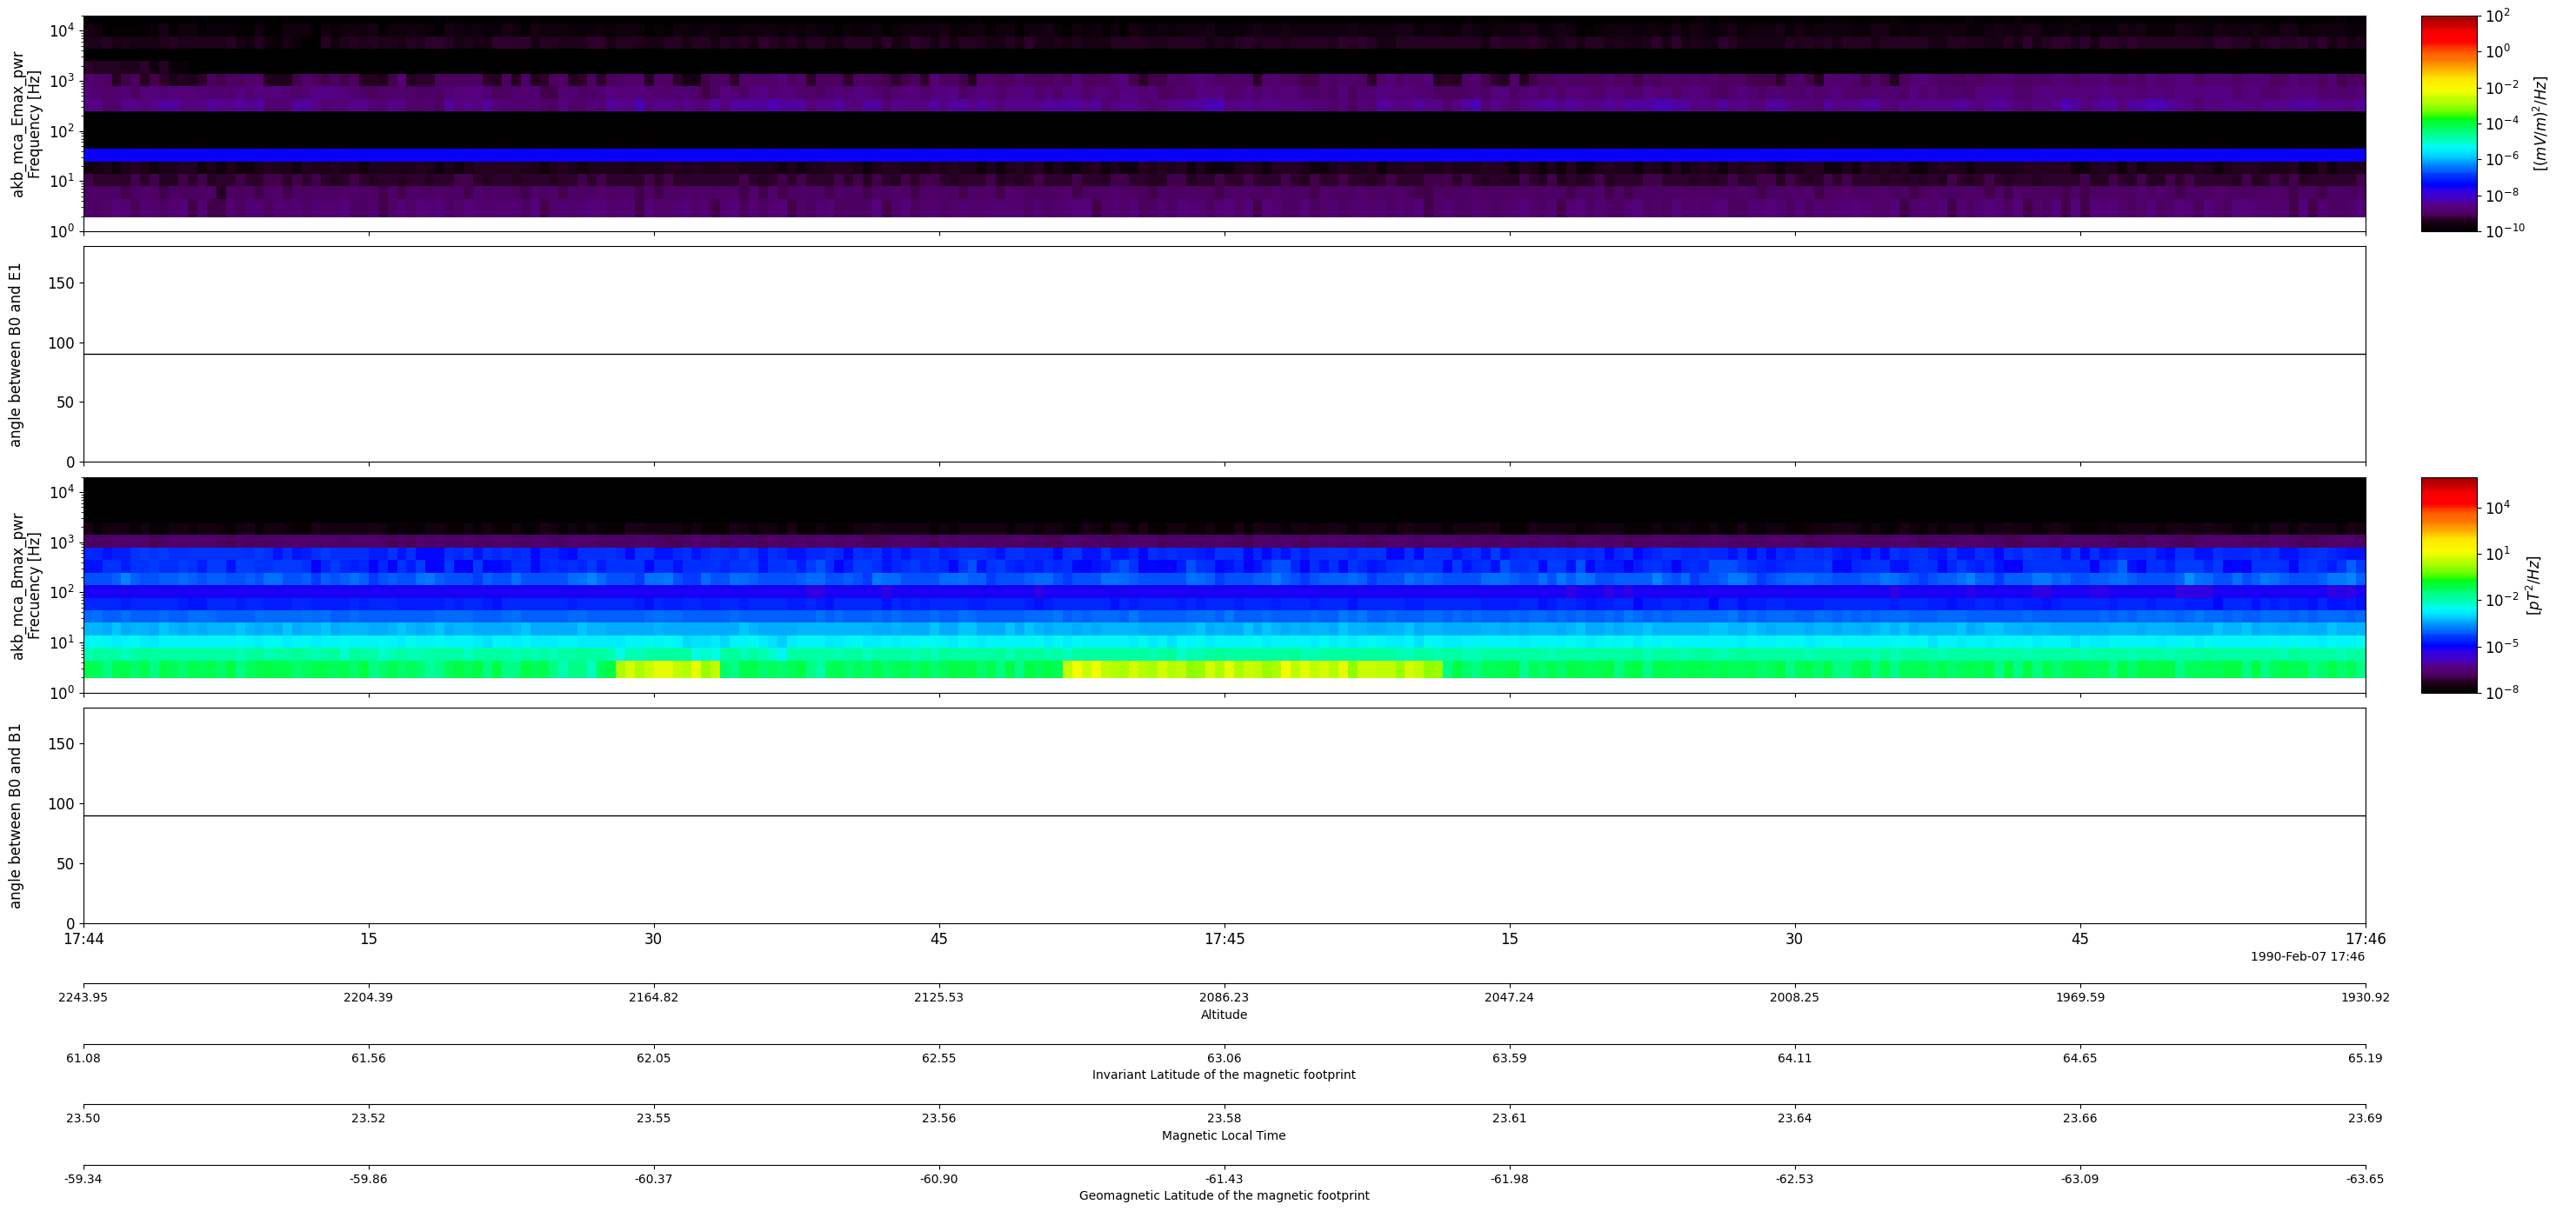

In [54]:
trange = [date+' 17:44:00',
          date+' 17:46:00']
import pytplot
pytplot.tlimit(trange)
pytplot.tplot(['akb_mca_Emax_pwr', 'angle_btwn_B0_Ey', 'akb_mca_Bmax_pwr', 'angle_btwn_B0_sBy'],
              var_label=['akb_orb_ALT', 'akb_orb_inv', 'akb_orb_MLT', 'akb_orb_fmlat'],
              xsize=32, ysize=18,
              save_png='../plots/mca_spin_modulation/test'+trange[0])

In [ ]:
import cdflib
import utilities
import pytplot

mgf_cdf_name = '../akebono_data/mgf/ak_h0_mgf_'+date+'_v01.cdf'
mgf_xar = cdflib.cdf_to_xarray(mgf_cdf_name)

B0_epoch = mgf_xar['Epoch'].data
epoch_start_idx = utilities.find_nearest(B0_epoch, pytplot.time_double('1990-02-15 17:26:00'))
epoch_end_idx = utilities.find_nearest(B0_epoch, pytplot.time_double('1990-02-15 17:31:00'))


mca dynamic spectrum

In [3]:
import akebono
import pytplot
from store_high_time_res_spectrum_data import store_mca_high_time_res_data
trange = ['1990-2-3', '1990-2-4']
akebono.orb(trange=trange)
store_mca_high_time_res_data(date=trange[0], datatype='pwr', del_invalid_data=['off', 'bit rate m'])
pytplot.tplot_names()

24-May-23 01:30:10: File is current: ../akebono_data/orbit/daily/199002/ED900203.txt


0 : akb_orb_geo
1 : akb_orb_gdlat
2 : akb_orb_gdlon
3 : akb_orb_inv
4 : akb_orb_fmlat
5 : akb_orb_MLT
6 : akb_orb_ALT
7 : akb_orb_gcalt
8 : akb_orb_gclat
9 : akb_orb_gclon
10 : akb_orb_bmdl_scaler
11 : akb_mca_Emax
12 : akb_mca_Eave
13 : akb_mca_Bmax
14 : akb_mca_Bave
15 : akb_mca_PostGap
16 : akb_mca_Emax_pwr
17 : akb_mca_Eave_pwr
18 : akb_mca_Bmax_pwr
19 : akb_mca_Bave_pwr


['akb_orb_geo',
 'akb_orb_gdlat',
 'akb_orb_gdlon',
 'akb_orb_inv',
 'akb_orb_fmlat',
 'akb_orb_MLT',
 'akb_orb_ALT',
 'akb_orb_gcalt',
 'akb_orb_gclat',
 'akb_orb_gclon',
 'akb_orb_bmdl_scaler',
 'akb_mca_Emax',
 'akb_mca_Eave',
 'akb_mca_Bmax',
 'akb_mca_Bave',
 'akb_mca_PostGap',
 'akb_mca_Emax_pwr',
 'akb_mca_Eave_pwr',
 'akb_mca_Bmax_pwr',
 'akb_mca_Bave_pwr']

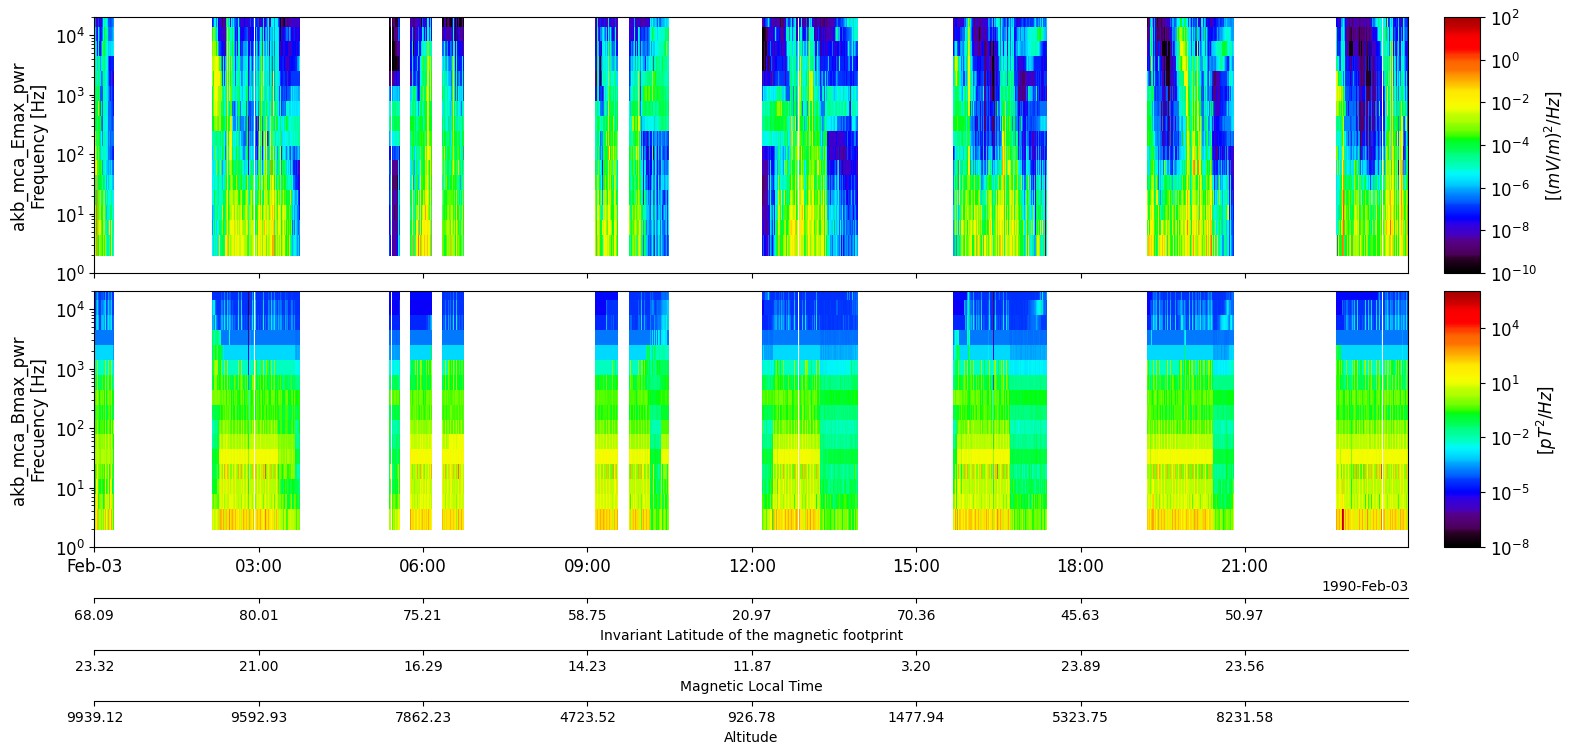

In [18]:
pytplot.tlimit(['1990-2-3 00:00:00', '1990-2-3 23:59:00'])
pytplot.tplot(['akb_mca_Emax_pwr', 'akb_mca_Bmax_pwr'],
              var_label=['akb_orb_inv', 'akb_orb_MLT', 'akb_orb_ALT'],
              xsize=18, ysize=10, display=False)

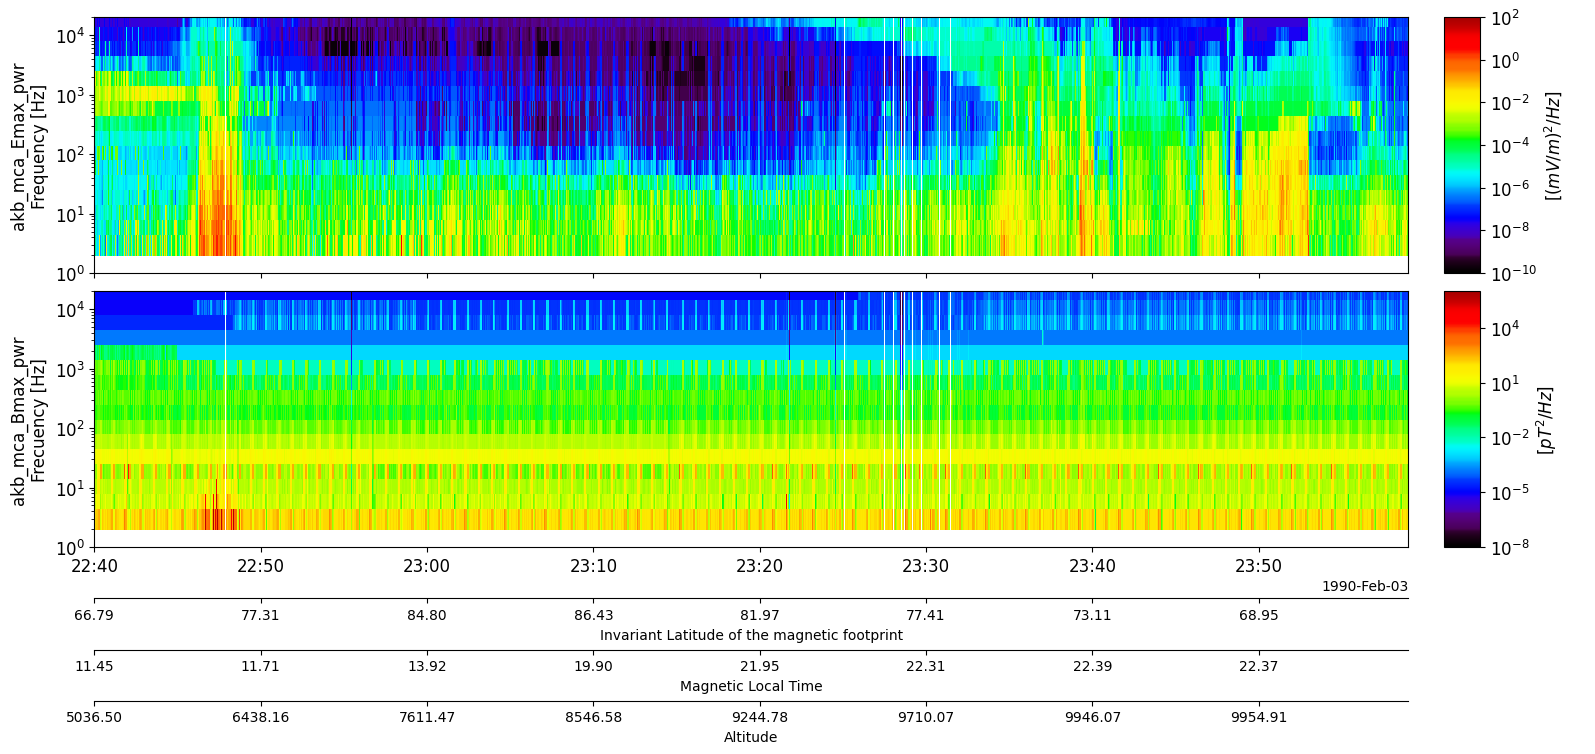

In [20]:
pytplot.tlimit(['1990-2-3 22:40:00', '1990-2-3 23:59:00'])
pytplot.tplot(['akb_mca_Emax_pwr', 'akb_mca_Bmax_pwr'],
              var_label=['akb_orb_inv', 'akb_orb_MLT', 'akb_orb_ALT'],
              xsize=18, ysize=10, display=False)

23-Apr-23 16:14:16: Downloading remote index: http://darts.isas.jaxa.jp/stp/data/exosd/pws/NPW-DS/1990/
23-Apr-23 16:14:16: File is current: ../akebono_data/pws/NPW-DS/1990/ak_h1_pws_19900225_v01.cdf


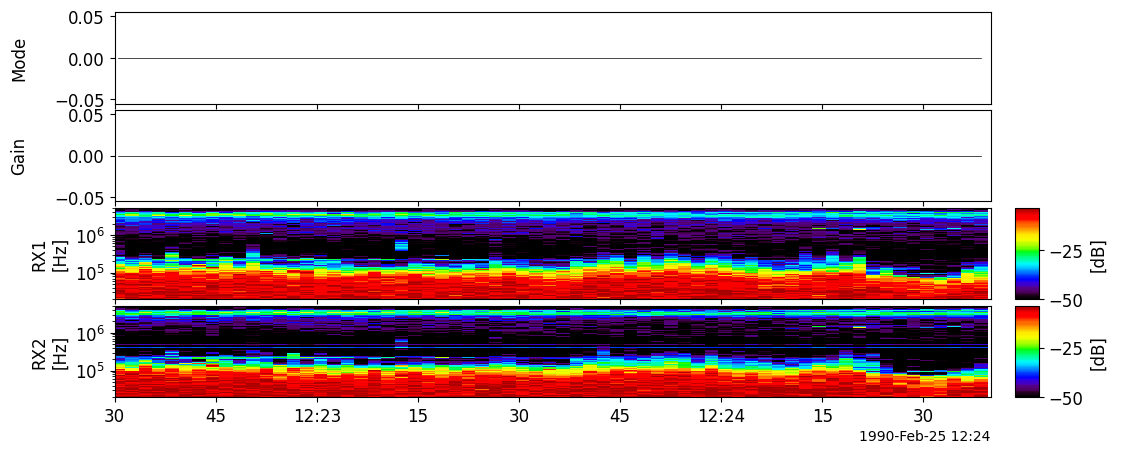

In [7]:
import akebono
import pytplot

date='19900225'
akebono.pws(['1990-2-25', '1990-2-26'])
pytplot.tlimit([date[0:4]+'-'+date[4:6]+'-'+date[6:8]+' 12:22:30',
                date[0:4]+'-'+date[4:6]+'-'+date[6:8]+' 12:24:40'])
pytplot.tplot(['akb_pws_Mode', 'akb_pws_Gain', 'akb_pws_RX1', 'akb_pws_RX2'])

In [2]:
import cdflib

cdf_name = '../akebono_data/pws/NPW-DS/2012/ak_h1_pws_20121001_v01.cdf'

xar = cdflib.cdf_to_xarray(cdf_name)
xar

<xarray.Dataset>
Dimensions:    (Epoch: 3404, Frequency: 512)
Coordinates:
  * Epoch      (Epoch) float64 6.352e+13 6.352e+13 ... 6.352e+13 6.352e+13
  * Frequency  (Frequency) float32 2.027e+04 2.121e+04 ... 5.167e+06 5.197e+06
Data variables:
    Mode       (Epoch) uint8 32 32 32 32 32 32 32 32 ... 32 32 32 32 32 32 32 32
    Gain       (Epoch) uint8 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RX1        (Epoch, Frequency) float32 -50.0 -50.0 -50.0 ... -45.25 -44.56
    RX2        (Epoch, Frequency) float32 -49.5 -48.0 -48.5 ... -50.0 -50.0
Attributes: (12/24)
    Project:                     ISTP>International Solar-Terrestrial Physics
    Source_name:                 Akebono > Akebono spacecraft
    Discipline:                  Space Physics>Magnetospheric Science
    Data_type:                   H1 > High Resolution data
    Descriptor:                  PWS > Plasma Waves and Sounder
    Data_version:                1
    ...                          ...
    MODS:                         
    Rules_of_use:                 In order to confirm the reliability of the ...
    Time_resolution:             2s
    TITLE:                       Akebono PWS data
    Start time:                  01-Oct-2012 00:00:00.000
    End time:                    01-Oct-2012 23:59:59.999

.tolist()のところがバグってるっぽい

In [ ]:
import numpy as np
import cdflib
times = np.float64(2)
times_datetime = cdflib.cdfepoch.to_datetime(times)
print(times_datetime)

times_brokedown = cdflib.cdfepoch.breakdown(times)
print(times_brokedown)
times_alteast2d = np.atleast_2d(times_brokedown)
print(times_alteast2d)
times_compose_date = cdflib.cdfepoch._compose_date(*times_alteast2d.T).astype('datetime64[us]')
print(times_compose_date)
print(times_compose_date.tolist())

[-62167219199998000]
[0, 1, 1, 0, 0, 0, 2]
[[0 1 1 0 0 0 2]]
['0000-01-01T00:00:00.002000']
[-62167219199998000]


アンテナとB0の角度範囲

In [2]:
from get_antenna_angle import unit_vector, angle_between_vectors
import cdflib
import numpy as np

date = '19900203'
trange = [date[0:4]+'-'+date[4:6]+'-'+date[6:8]+' 12:20:00',
          date[0:4]+'-'+date[4:6]+'-'+date[6:8]+' 12:30:00']
Ey_antenna_vector = np.array([-np.sin(np.deg2rad(35)),
                              np.cos(np.deg2rad(35)),
                              0])
sBy_antenna_vector = np.array([0.0, -1.0, 0.0])

cdf_name = '../akebono_data/mgf/ak_h0_mgf_'+date+'_v01.cdf'
mgf_xary = cdflib.cdf_to_xarray(cdf_name)

B0_epoch = mgf_xary['Epoch'].data
B0_ary = mgf_xary['B0_spin'].data

angle_btwn_B0_Ey = np.empty(int(B0_ary.shape[0]))
angle_btwn_B0_sBy = np.empty(int(B0_ary.shape[0]))
angle_btwn_B0_antenna_epoch = np.empty(int(B0_ary.shape[0]))

for i in range(int(B0_ary.shape[0])):

    if B0_epoch[i] == 0.0:
        angle_btwn_B0_antenna_epoch[i] = 0.0
        angle_btwn_B0_Ey[i] = np.nan
        angle_btwn_B0_sBy[i] = np.nan
    else:
        # mgfのデータ構造
        # epoch: 長さ172799の1次元配列 (1日/0.5秒=172800)
        # b0_spin: 172799*3*16の3次元配列
        # 0.5sごとに3軸の16個のデータがあり、各軸の平均値を取る
        angle_btwn_B0_antenna_epoch[i] = B0_epoch[i]
        B0_vector = np.array([np.average(B0_ary[i][0]),
                              np.average(B0_ary[i][1]),
                              np.average(B0_ary[i][2])])

        B0_unit_vector = unit_vector(B0_vector)
        angle_btwn_B0_Ey[i] = angle_between_vectors(B0_unit_vector, Ey_antenna_vector)
        angle_btwn_B0_sBy[i] = angle_between_vectors(B0_unit_vector, sBy_antenna_vector)
print('min angle:', np.nanmin(angle_btwn_B0_Ey), np.nanmin(angle_btwn_B0_sBy))
print('max angle:', np.nanmax(angle_btwn_B0_Ey), np.nanmax(angle_btwn_B0_sBy))

min angle: 0.13670840690164185 0.48738632225834483
max angle: 179.50583386928145 179.29946610116264


tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT
tinterpol (linear) was applied to: sc_vel


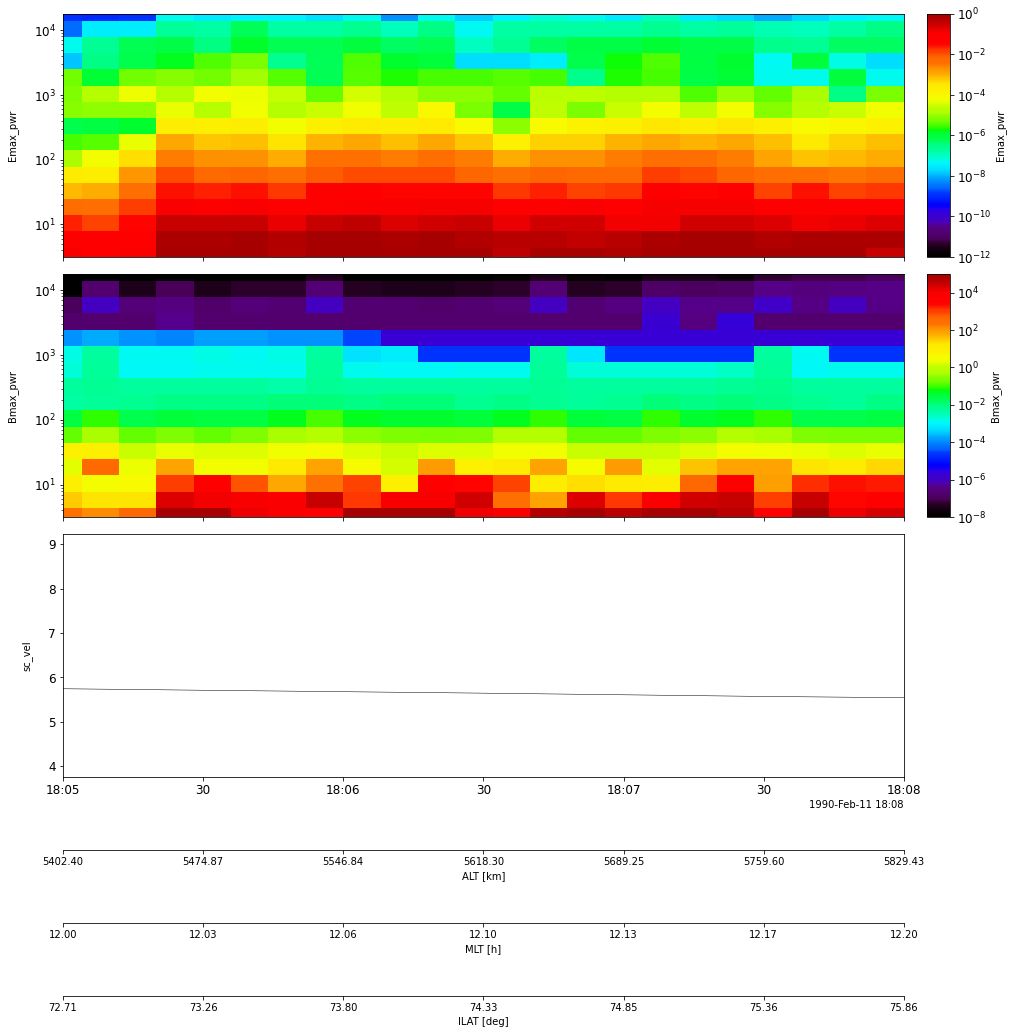

In [ ]:
import load 
import pytplot
from pytplot import options, store_data, get_data
import pyspedas
import numpy as np
from pytplot.MPLPlotter.tplot import tplot

trange = ['1990-2-11', '1990-2-12']
load.mca(trange, spec_type='pwr', del_invalid_data=['off', 'noisy', 'bdr', 'bit rate m', 'pws'])
load.orb(trange)

postgap = get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 6])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",    
    postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5] = \
    int(postgap_str[7]), int(postgap_str[6])+0.1, int(postgap_str[3])+0.2, int(postgap_str[2])+0.3, int(postgap_str[1])+0.4, int(postgap_str[0])+0.5 

store_data('Inst_flag', data = {'x':postgap.times, 'y':postgap_array})
store_data('sms_flag', data={'x':postgap.times, 'y':postgap_array.T[3]})
#set yaxis option "legend_location" as "spedas"
#a = pytplot.data_quants['Inst_flag']
#a.attrs['plot_options']['yaxis_opt']['legend_location'] = 'spedas'
options(['Inst_flag', 'sms_flag'], opt_dict={'yrange':[-0.3, 1.5], 'panel_size':0.3})
options('Inst_flag', opt_dict={'legend_names':['off', 'noisy', 'BDR', 'SMS', 'Bit rate M', 'PWS'], 'legend_location':'spedas'})

pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method='nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')
pyspedas.tinterpol('akb_sc_vel', interp_to = 'Emax', newname = 'sc_vel')
options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

options('ALT', 'ytitle', 'ALT [km]')
options('MLT', 'ytitle', 'MLT [h]')
options('ILAT', 'ytitle', 'ILAT [deg]')

pytplot.tlimit([trange[0]+' 18:05:00', trange[0]+' 18:08:00'])
tplot(['Emax_pwr','Bmax_pwr', 'sc_vel'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)


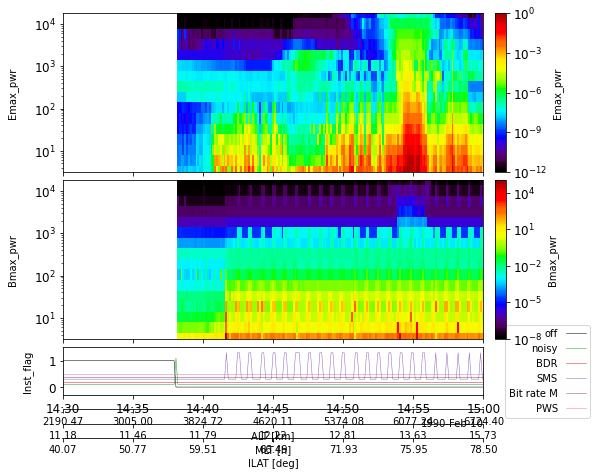

In [ ]:
pytplot.tlimit([trange[0]+' 14:30:00', trange[0]+' 15:00:00'])
#pytplot.timebar([ trange[0] + ' 14:54:30',trange[0] + ' 14:55:40'], thick=1)
#options(['Emax_pwr','Bmax_pwr', 'ALT', 'MLT', 'ILAT'], 'char_size', 24)
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 8, ysize = 10)

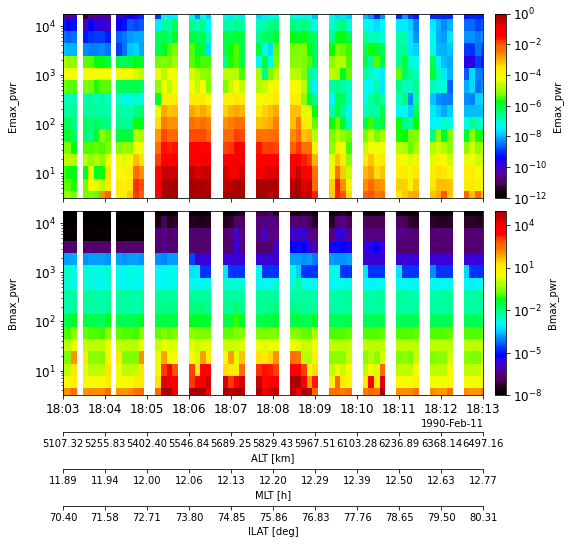

In [ ]:
pytplot.tlimit([trange[0]+' 18:03:00', trange[0]+' 18:13:00'])
#pytplot.timebar([trange[0] + ' 18:05:39', trange[0] + ' 18:07:15'], thick=4)
tplot(['Emax_pwr','Bmax_pwr'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 8, ysize = 10)

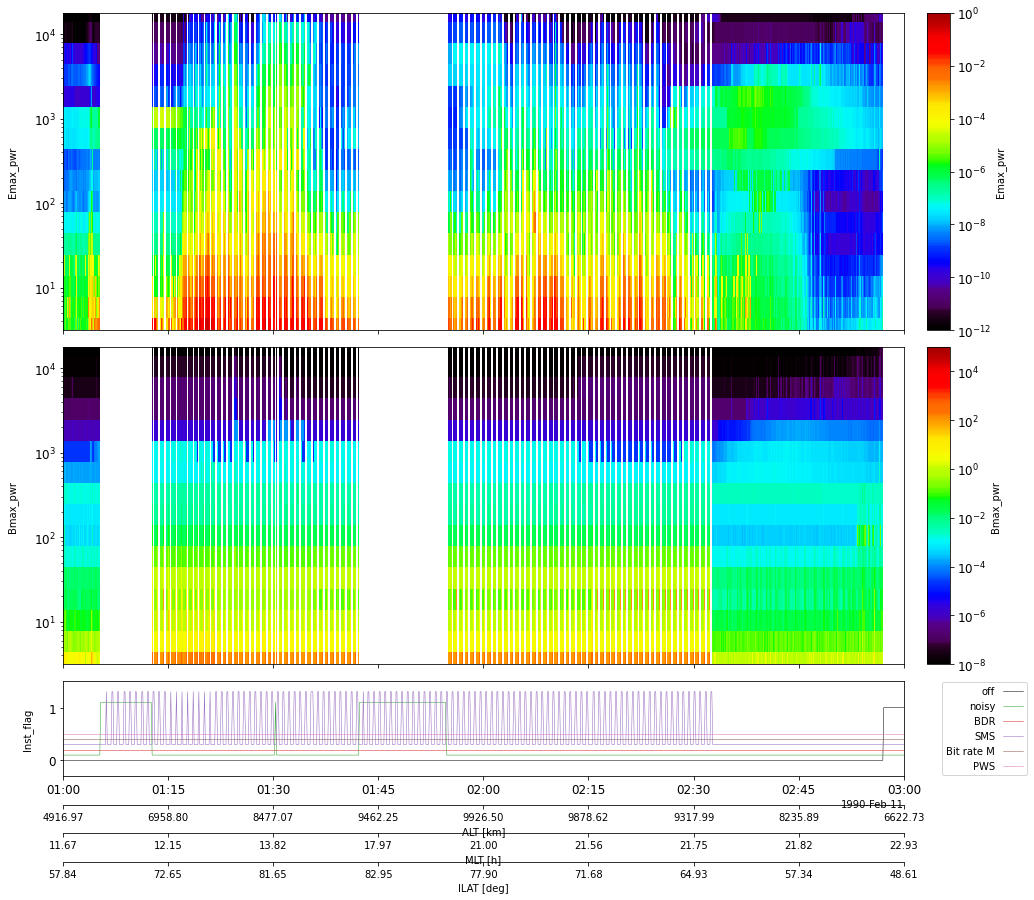

In [ ]:
pytplot.tlimit([trange[0]+' 1:00:00', trange[0]+' 3:00:00'])
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)

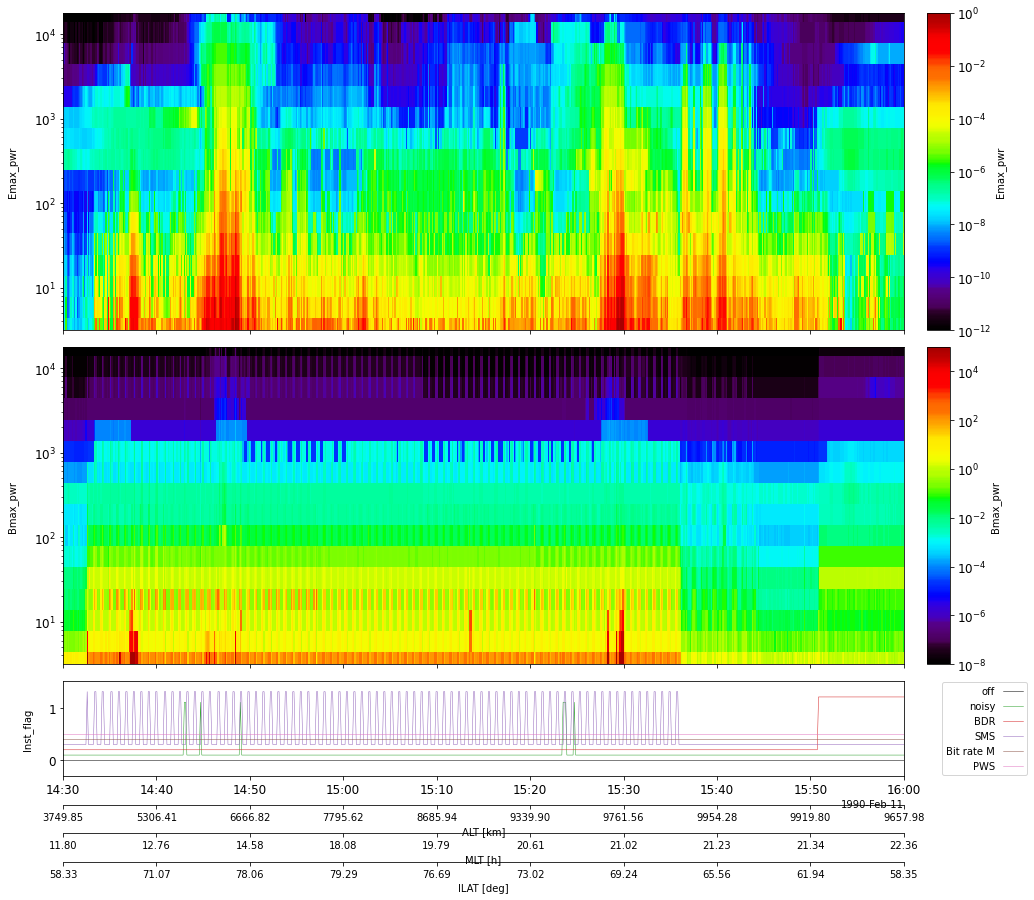

In [ ]:
pytplot.tlimit([trange[0]+' 14:30:00', trange[0]+' 16:00:00'])
tplot(['Emax_pwr','Bmax_pwr', 'Inst_flag'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 16, ysize = 20)

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT


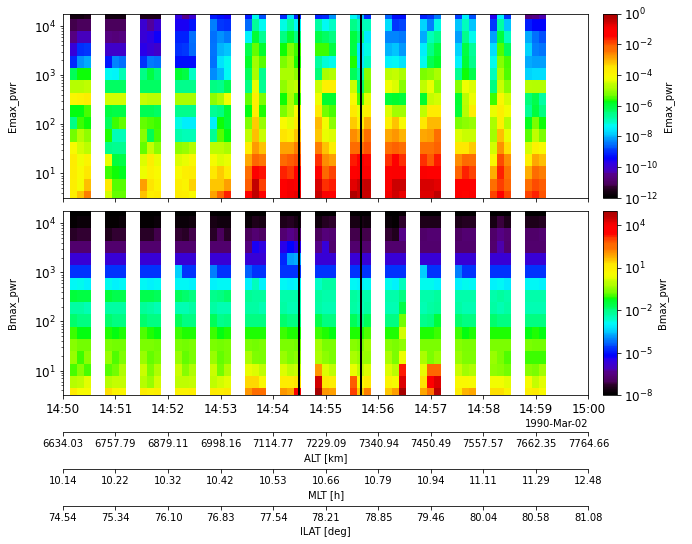

In [ ]:
import load 
import pytplot
from pytplot import options, store_data, get_data, timebar
import pyspedas
import numpy as np
from pytplot.MPLPlotter.tplot import tplot

trange = ['1990-3-2', '1990-3-3']
load.mca(trange, spec_type='pwr', del_invalid_data=['off', 'noisy', 'sms', 'bdr'])
load.orb(trange)

pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method='nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

options('ALT', 'ytitle', 'ALT [km]')
options('MLT', 'ytitle', 'MLT [h]')
options('ILAT', 'ytitle', 'ILAT [deg]')

timebar(t=[pyspedas.time_double(trange[0] + ' 14:54:30'),  pyspedas.time_double(trange[0] + ' 14:55:40')], thick=2)
#timebar(t=pyspedas.time_double(trange[0] + ' :45:56'), dash=True)
pytplot.tlimit([trange[0]+' 14:50:00', trange[0]+' 15:00:00'])
tplot(['Emax_pwr','Bmax_pwr'],  var_label= ['ALT', 'MLT', 'ILAT'], xsize = 10, ysize = 10)

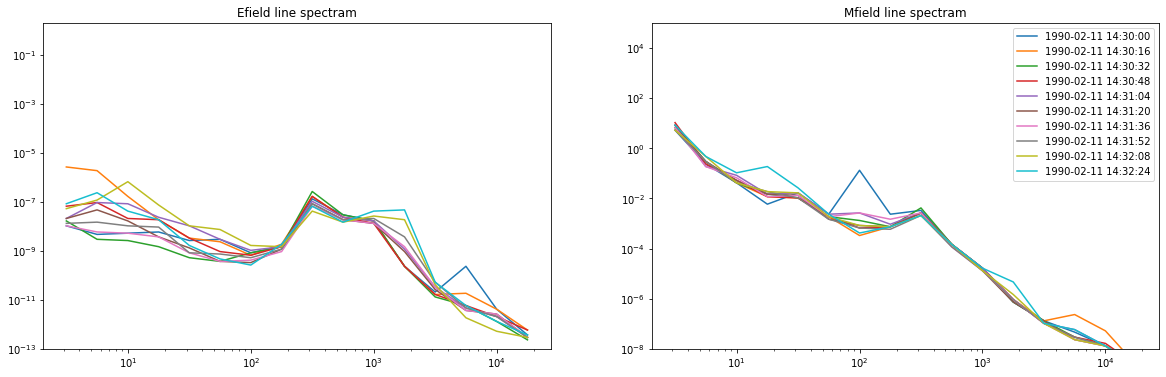

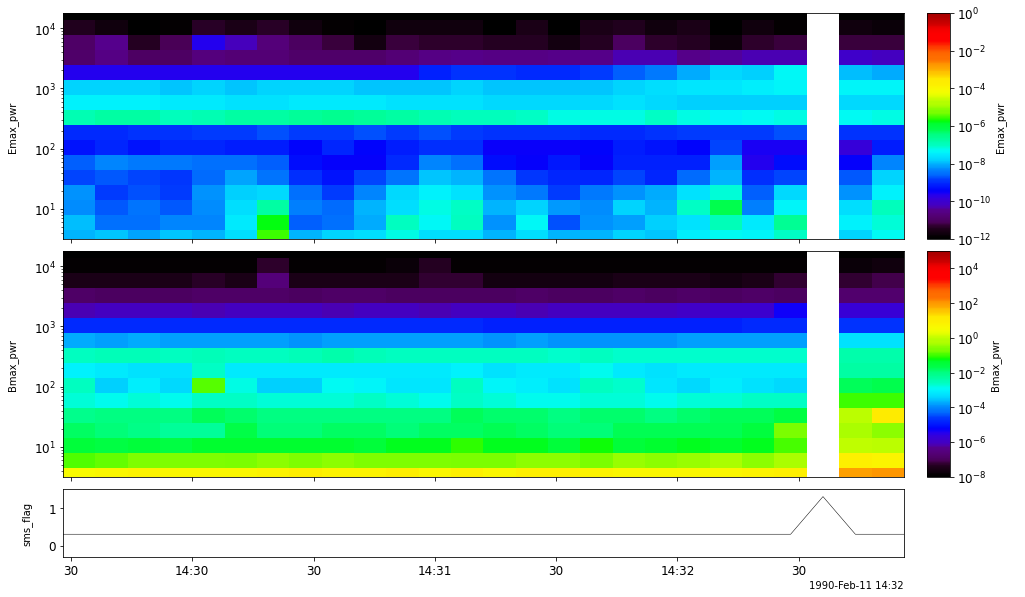

In [ ]:
import load
import pyspedas
import pytplot
import matplotlib.pyplot as plt
from pytplot.MPLPlotter.tplot import tplot

trange = ['1990-2-11', '1990-2-12']
load.mca(trange = trange, del_invalid_data=['off', 'SMS'])
Emax_tvar = get_data('Emax_pwr')
Bmax_tvar = get_data('Bmax_pwr')

postgap = get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 6])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",             "BDR",               "SMS",               "Bit rate",          "PWS",    
    postgap_array[i][0], postgap_array[i][1], postgap_array[i][2], postgap_array[i][3], postgap_array[i][4], postgap_array[i][5] = \
    int(postgap_str[7]), int(postgap_str[6])+0.1, int(postgap_str[3])+0.2, int(postgap_str[2])+0.3, int(postgap_str[1])+0.4, int(postgap_str[0])+0.5 

store_data('Inst_flag', data = {'x':postgap.times, 'y':postgap_array})
store_data('sms_flag', data={'x':postgap.times, 'y':postgap_array.T[3]})
#set yaxis option "legend_location" as "spedas"
#a = pytplot.data_quants['Inst_flag']
#a.attrs['plot_options']['yaxis_opt']['legend_location'] = 'spedas'
options(['Inst_flag', 'sms_flag'], opt_dict={'yrange':[-0.3, 1.5], 'panel_size':0.3})
options('Inst_flag', opt_dict={'legend_names':['off', 'noisy', 'BDR', 'SMS', 'Bit rate M', 'PWS'], 'legend_location':'spedas'})

start_time = pyspedas.time_double(['1990-02-11'])

#no sms interference
hr, tens_of_min = 14, 3 #min shuld be 0, 1, 2, 3, 4 or 5 + 0, 0.2, 0.4, 0.6, 0.8
slice_time_index = 450*hr + 75*tens_of_min
slice_time = start_time[0] + slice_time_index * 8

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(10):
    ax1.plot(Emax_tvar.v, Emax_tvar.y[slice_time_index+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
    ax2.plot(Bmax_tvar.v, Bmax_tvar.y[slice_time_index+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Efield line spectram')
ax1.set_ylim(1e-13, 2)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Mfield line spectram')
ax2.set_ylim(1e-8, 1e5)
ax2.legend()

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

pytplot.tlimit([slice_time-32, slice_time+22*8])
tplot(['Emax_pwr','Bmax_pwr', 'sms_flag'], xsize=16)

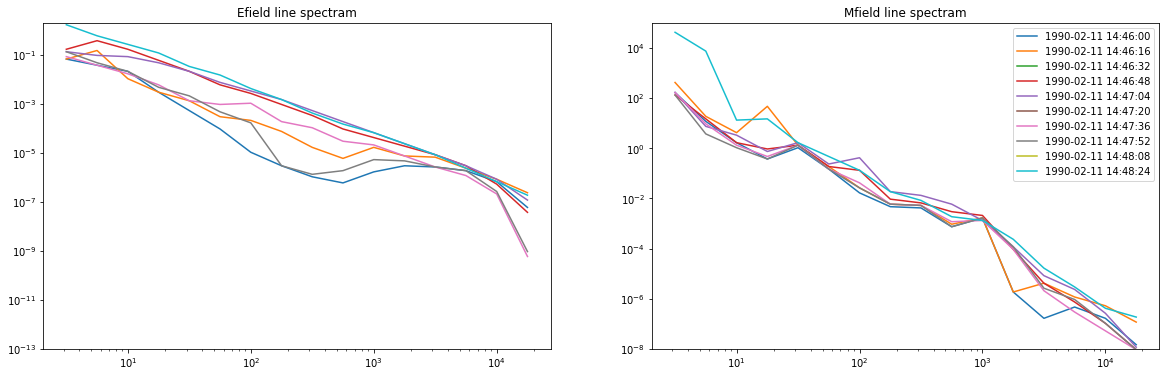

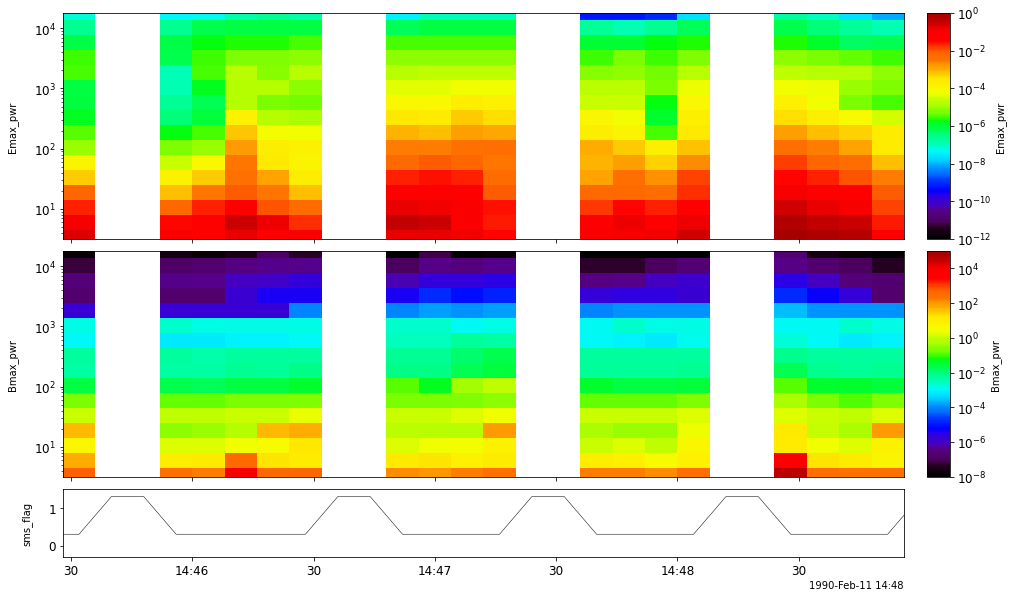

In [ ]:
#sms interference
hr, tens_of_min = 14, 4.6 #min shuld be 0, 1, 2, 3, 4 or 5 + 0, 0.2, 0.4, 0.6, 0.8
slice_time_index = 450*hr + 75*tens_of_min
slice_time = start_time[0] + slice_time_index * 8

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(10):
    ax1.plot(Emax_tvar.v, Emax_tvar.y[int(slice_time_index)+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
    ax2.plot(Bmax_tvar.v, Bmax_tvar.y[int(slice_time_index)+i*2], label = pyspedas.time_string(slice_time+i*2*8, fmt = '%Y-%m-%d %H:%M:%S'))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Efield line spectram')
ax1.set_ylim(1e-13, 2)


ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Mfield line spectram')
ax2.set_ylim(1e-8, 1e5)
ax2.legend()

options('Emax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-12, 1]})
options('Bmax_pwr', opt_dict={'spec':1, 'ylog':1, 'zlog':1, 'zrange':[1e-8, 1e5]})

pytplot.tlimit([slice_time-32, slice_time+22*8])
tplot(['Emax_pwr','Bmax_pwr', 'sms_flag'], xsize=16)

cdfの情報を見る

In [ ]:
from pytplot import cdf_to_tplot
import pytplot
cdf_to_tplot('./Akebono_MCA_data/ak_h1_mca_19890101_v02.cdf')
gatt = get_data('Eave', metadata=True)['CDF']['VATT']
pytplot.data_quants['Eave']

<xarray.DataArray 'Eave' (time: 10800, v_dim: 16)>
array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
Coordinates:
  * time       (time) float64 5.996e+08 5.996e+08 ... 5.997e+08 5.997e+08
    spec_bins  (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
    v          (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'AVG_TYPE': 'log', 'CATDESC': 'Electric field av...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [ ]:
import load 
import pytplot
import pyspedas
import numpy as np

trange = ['1990-2-11', '1990-2-12']
load.mca(trange, del_invalid_data=True)
load.orb(trange)
tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2) / bandwidth
    pytplot.store_data(tplot_names[i] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_names[i] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})

try:
    pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
except:
    print('orbit file is not perfect')
pyspedas.tinterpol('akb_MLAT', interp_to = 'Emax', newname = 'MLAT')
pyspedas.tinterpol('akb_MLT', interp_to = 'Emax', newname = 'MLT', method = 'nearest')
pyspedas.tinterpol('akb_ALT', interp_to = 'Emax', newname = 'ALT')

pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'spec', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ylog', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'zlog', 1)
pytplot.options('Emax_pwr', 'ztitle', 'Electric field PSD \n [(mV/m)^2/Hz]')
pytplot.options('Emax_pwr', 'zrange', [1e-6, 1])
pytplot.options('Bmax_pwr', 'ztitle', 'Magnetic field PSD \n [(pT)^2/Hz]')
pytplot.options('Bmax_pwr', 'zrange', [1e-8, 1e1])
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ytitle', 'freq [Hz]')
pytplot.tlimit([trange[0]+' 18:00:00', trange[0]+' 18:15:00'])

postgap = pytplot.get_data('PostGap')
postgap_array = np.empty([postgap.y.size, 8])
for i in range(postgap.y.size):
    postgap_str = format(postgap.y[i], '08b')
    #"off"               "noisy",                  "BDR",                   "SMS",                    "Bit rate",              "PWS",                    "3bit",              "4bit"
    postgap_array[i][0], postgap_array[i][1],      postgap_array[i][2],     postgap_array[i][3],      postgap_array[i][4],     postgap_array[i][5],      postgap_array[i][6], postgap_array[i][7] = \
    int(postgap_str[7]), int(postgap_str[6])+0.05, int(postgap_str[3])+0.1, int(postgap_str[2])+0.15, int(postgap_str[1])+0.2, int(postgap_str[0])+0.25, int(postgap_str[4])-0.2, int(postgap_str[5])-0.25, 
pytplot.store_data('postgap', data={'x':postgap.times, 'y':postgap_array}) 

pytplot.options('postgap', 'Color', ['r','g','b','m','y','c','k','k'])
pytplot.options('postgap', 'legend_names', ["off", "noisy", "BDR", "SMS", "Bit rate", "PWS", "3bit", '4bit'])
pytplot.options('postgap', 'legend_location', 'spedas')
pytplot.options('postgap', 'yrange', [-0.3, 1.7])
pytplot.options('postgap', 'thick', 1.0)

pytplot.options(['ALT', 'MLT', 'ILAT'], 'panel_size', 0.3)
pytplot.options(['Bmax_pwr', 'Emax_pwr', 'postgap'], 'panel_size', 1.0)
pytplot.options('ALT', 'ytitle', 'ALT [km]')
pytplot.options('MLT', 'ytitle', 'MLT [h]')
pytplot.options('ILAT', 'ytitle', 'ILAT [deg]')
pytplot.tplot_options('vertical_spacing', 2)
pytplot.tplot_options('wsize', [1000, 1000])
pytplot.tplot(['Bmax_pwr', 'Emax_pwr', 'postgap'], var_label= ['ALT', 'MLT', 'ILAT'], save_png = 'test_1000-1000.png')




QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-www'
30-Sep-22 15:09:23: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



[]
tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT
tinterpol (linear) was applied to: ALT


30-Sep-22 15:09:26: /home/www/.local/lib/python3.8/site-packages/pytplot/tplot_utilities.py:312: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  map = [(np.array(cm(x))*255).astype(np.int) for x in range(0, cm.N)]

30-Sep-22 15:09:29: /home/www/.local/lib/python3.8/site-packages/pytplot/tplot_utilities.py:312: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.i

sms 稼働終了日時を見る

In [ ]:
import load 
import pytplot
from pytplot import options, store_data, get_data
import pyspedas
import numpy as np
import pandas as pd

start_date = '1989-04-01'
end_date = '2014-10-01'

date_list = pd.date_range(start=start_date, end=end_date, freq='MS')
date_list = np.datetime_as_string(date_list, unit='D')
date_list = date_list.astype(object)
date_list

array(['1989-04-01', '1989-05-01', '1989-06-01', '1989-07-01',
       '1989-08-01', '1989-09-01', '1989-10-01', '1989-11-01',
       '1989-12-01', '1990-01-01', '1990-02-01', '1990-03-01',
       '1990-04-01', '1990-05-01', '1990-06-01', '1990-07-01',
       '1990-08-01', '1990-09-01', '1990-10-01', '1990-11-01',
       '1990-12-01', '1991-01-01', '1991-02-01', '1991-03-01',
       '1991-04-01', '1991-05-01', '1991-06-01', '1991-07-01',
       '1991-08-01', '1991-09-01', '1991-10-01', '1991-11-01',
       '1991-12-01', '1992-01-01', '1992-02-01', '1992-03-01',
       '1992-04-01', '1992-05-01', '1992-06-01', '1992-07-01',
       '1992-08-01', '1992-09-01', '1992-10-01', '1992-11-01',
       '1992-12-01', '1993-01-01', '1993-02-01', '1993-03-01',
       '1993-04-01', '1993-05-01', '1993-06-01', '1993-07-01',
       '1993-08-01', '1993-09-01', '1993-10-01', '1993-11-01',
       '1993-12-01', '1994-01-01', '1994-02-01', '1994-03-01',
       '1994-04-01', '1994-05-01', '1994-06-01', '1994-

In [ ]:
import load 
import pytplot
from pytplot import options, store_data, get_data
import pyspedas
import numpy as np
import pandas as pd

start_date = '1998-2-01'
end_date = '2014-10-01'

date_list = pd.date_range(start=start_date, end=end_date, freq='MS')
date_list = np.datetime_as_string(date_list, unit='D')
date_list = date_list.astype(object)

E_matrix = np.zeros((16, 254))
E_sms_matrix = np.zeros((16, 254))
B_matrix = np.zeros((16, 254))
B_sms_matrix = np.zeros((16, 254))

freq_array = np.array([3.16, 5.62, 10.0, 17.8,
                        31.6, 56.2, 100,  178,
                        316,  562,  1000, 1780,
                        3160, 5620, 10000,17800])
intensity_array = np.arange(1,255)

for i in range(date_list.size):
    print(date_list[i])
    
    load.mca([pyspedas.time_double(date_list[i]), pyspedas.time_double(date_list[i])+86400])

    postgap = get_data('PostGap')
    sms_flag_array = np.empty([postgap.y.size])
    for j in range(postgap.y.size):
        postgap_str = format(postgap.y[j], '08b')    
        sms_flag_array[j] = int(postgap_str[2]) 

    sms_on_tuple = np.where(sms_flag_array==1)
    sms_on_index = sms_on_tuple[0]
    
    if sms_on_index.size == 0:
        print('------')
        print(date_list[i])
        print('------')


1998-02-01
1998-03-01
1998-04-01
1998-05-01
1998-06-01
1998-07-01
1998-08-01
1998-09-01
1998-10-01
1998-11-01
1998-12-01
1999-01-01
------
1999-01-01
------
1999-02-01
------
1999-02-01
------
1999-03-01
1999-04-01
1999-05-01
1999-06-01
1999-07-01
1999-08-01
1999-09-01
1999-10-01
1999-11-01
1999-12-01
2000-01-01
------
2000-01-01
------
2000-02-01
2000-03-01
2000-04-01
------
2000-04-01
------
2000-05-01
2000-06-01
2000-07-01
------
2000-07-01
------
2000-08-01
2000-09-01
2000-10-01
2000-11-01
2000-12-01
2001-01-01
------
2001-01-01
------
2001-02-01
2001-03-01
2001-04-01
2001-05-01
2001-06-01
2001-07-01
2001-08-01
2001-09-01
2001-10-01
2001-11-01
2001-12-01
2002-01-01
------
2002-01-01
------
2002-02-01
2002-03-01
2002-04-01
2002-05-01
2002-06-01
------
2002-06-01
------
2002-07-01
------
2002-07-01
------
2002-08-01
2002-09-01
------
2002-09-01
------
2002-10-01
2002-11-01
2002-12-01
2003-01-01
------
2003-01-01
------
2003-02-01
------
2003-02-01
------
2003-03-01
2003-04-01
2003-05